# Hypothesis Testing
>  T-Test | Correlation | Chi Square

In [1]:
from math import sqrt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydataset
from scipy import stats
from ipywidgets import interact

## Golden Codys

- 1 / 4 chance to win
- 1000 tickets

([<matplotlib.axis.XTick at 0x1a1b87dbd0>,
 <a list of 2 Text xticklabel objects>)

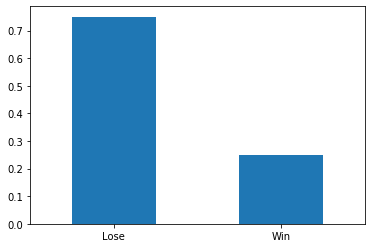

In [2]:
tickets = pd.Series([True] * 250 + [False] * 750)
tickets.value_counts(normalize=True).plot.bar()
plt.xticks([0, 1], ['Lose', 'Win'], rotation=0)

We give everyone in a class a ticket

In [3]:
n = 40
tickets.sample(n).mean()

0.175

Sampling Errors

- non-response
- undercoverage
- voluntary
- leading questions
- social desireability

In [4]:
winrates = []

for i in range(10_000):
    winrate = tickets.sample(n).mean()
    winrates.append(winrate)

Central Limit Theorem: The **sampling distribution** is normally distributed even when the underlying random variable is not.

- the average of the sampling distribution ~ the population average
- the variance of the sampling distribution is the variance of the population divided by the sample size
- the standard deviation of the sampling distribution is ~ population standard deviation / $\sqrt{n}$
- the **standard error** == standard deviation of the sampling distribution

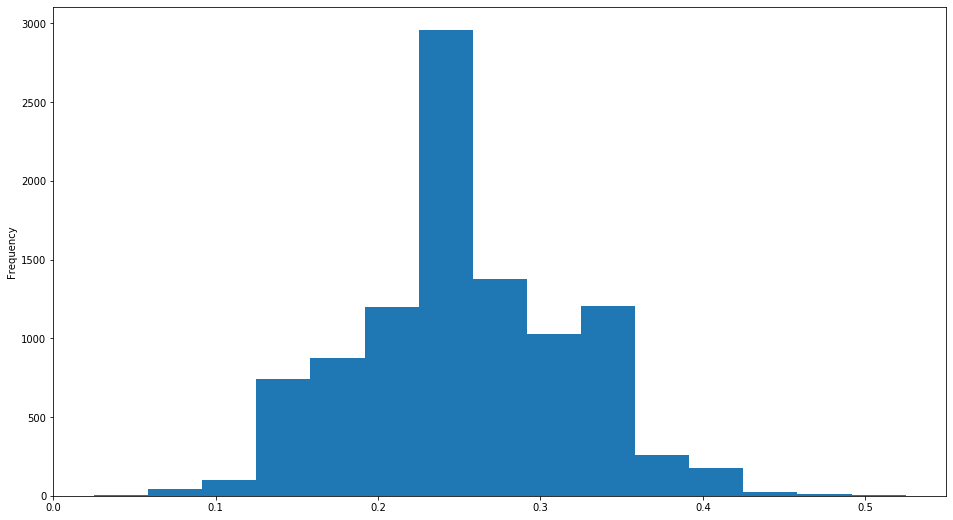

In [5]:
pd.Series(winrates).plot.hist(bins=15, figsize=(16, 9))

## Mini Exercise - CLT

1. Calculate, theoretically (in your head is fine), the expected value for the average of 6 dice rolls.
1. Write the code necessary to simulate taking the average of 6 dice rolls 10,000 times. Store each of the 10,000 averages in a list.
1. Plot the distribution of the calculated averages. What do you notice? What kind of distribution is the underlying random variable (i.e. one dice roll?)

In [6]:
def plot_dice_rolls(n_dice):
    n_sims = 10_000
    rolls = np.random.choice(range(1, 7), (n_sims, n_dice))

    plt.figure(figsize=(10, 7))
    plt.hist(rolls.mean(axis=1), density=True) # density=True gives us a %
    plt.title(f'Average of {n_dice} dice rolls based on {n_sims:,} simulations')
    plt.xlim(0, 7)
    plt.ylabel('% of times we get this value')
    plt.xlabel('Average')

    plt.show()

interact(plot_dice_rolls, n_dice=(1, 50, 2))

interactive(children=(IntSlider(value=25, description='n_dice', max=50, min=1, step=2), Output()), _dom_classe…

<function __main__.plot_dice_rolls(n_dice)>

## Hypothesis Testing

- **alpha**: $\alpha$: 1 - confidence level (95% confidence level -> $\alpha = .05$)
- **null hypothesis**: $H_0$: the "status quo"
- **alterternative hyopthesis**: $H_a$: the opposite; alternative

We either *reject* or *fail to reject* the null hypothesis

One of the webdev cohorts finds they have a winrate of 20%. They claim that they were cheated! and the tickets were distributed unfairly.

In [7]:
winrates = pd.Series(winrates)

What's the likelihood we see a 20% or less winrate (w/ 40 students) given that the true winrate is 25%?

- $H_0$: the winrate for this webdev class is the same as the overall winrate
- $H_a$: the winrate the this webdev class is less than the overall winrate

In [8]:
(winrates <= .2).mean()

0.2964

There's a 30% chance we'd see a winrate of 20% *or less* knowing that the overall winrate is 25%.

In [9]:
stats.norm(winrates.mean(), winrates.std()).cdf(.2)

0.22915021089742316

**p-value**

- P(data|$H_0$)
- The likelihood the we see the evidence at hand under the null hypothesis
- If the null hypothesis is true, the likelihood of observing our data

if $p < \alpha$: we reject $H_0$

if $p >= \alpha$: we fail to reject $H_0$

CL = 95% -> alpha == .05

p = .29

Because p >= alpha, we fail to reject $H_0$: the winrate for this webdev class is the same as the overall winrate

What's the likelihood we see a 20% winrate (w/ 25 students) or something more extreme? given that the true winrate is 25%

In [10]:
stats.norm(winrates.mean(), winrates.std()).cdf(.2) + stats.norm(winrates.mean(), winrates.std()).sf(.2999999999999)

0.45039630888300713

There's a 57% chance that we'd see a winrate of 20% or something more extreme (in either direction), purely due to the nature of sampling from a population.

---

A data science class calculates their win rate at 40%. The web dev students immediately accuse the person distributing the tickets of favoritism.

How likely is it that we see a 40% winrate (or something more extreme) purely due chance, given the actual winrate is 25%?

In [11]:
winrate_distribution = stats.norm(winrates.mean(), winrates.std())

winrate_distribution.sf(.4) + winrate_distribution.cdf(.1)

0.023557914507134223

In [12]:
winrate_distribution.cdf(.1) * 2

0.024367285701753623

- Are the average grades in web development vs data science classes different?

    $H_0$: The average grades for webdev and data science are the same.
    
    $H_a$: The average grades for webdev and data science are not the same.
    
    $H_a$: The average grades for webdev students are lower than those for data science students.

- Is there a relationship between how early a student shows up to class and their grade?

    $H_0$: there is no relationship between how early a student comes to class and their grade
    
    $H_a$: students that show up to class earlier have higher grades

- Are web dev or data science students more likely to be coffee drinkers?

    $H_0$: Which cohort a student is in is independent of whether or not they drink coffee

    $H_0$: Web dev and data science students are equally likely to be coffee drinkers
    
    $H_a$: Data science students are more likely to be coffee drinkers

- **two-tailed**: $H_0$ is formulated as $\neq$
- **one-tailed**: $H_0$ is formulated as < or >

### Hypothesis Testing Results

$H_0$: data science students' grades are the same as the overall average

$H_a$: data science students' grades are greater than the overall average

|                      | $H_0$ is true | $H_0$ is false |
| -------------------  | ------------- | -------------- |
| Fail to reject $H_0$ | TN            | FN (Type II)   |
| Reject $H_0$         | FP (Type I)   | TP             |

## Examples

- 99% confident
- $\alpha = 1 - .99 = .01$
- p: P(data|$H_0$)
- $p < \alpha$ -> reject $H_0$
- $p >= \alpha$ -> fail to reject $H_0$

> Are the plants helping?

- survey scores
    - $H_0$: Survey scores before and after plants were introduced are no different.
    - $H_a$: Survey scores improved after plants were introduced in the classroom.
- conversion rate of in-person tours before/after plants
- number of tardies
- grades
- engagement on social with plant pictures

- $H_0$: Survey scores before and after plants were introduced are no different.
- $H_a$: Survey scores improved after plants were introduced in the classroom.

- True Positive
    - small p-value -- < alpha (.001)
    - reject $H_0$
    - avg survey score before plants: 3.2
    - avg survey score after plants: 4.5
- False Positive
    - small p-value
    - reject $H_0$
    - we cancelled a quiz right before everyone took the surveys
- True Negative
    - higher p-value
    - fail to reject $H_0$
    - avg survey score before plants: 3.9
    - avg survey score after plants: 4.1
- False Negative
    - higher p-value
    - fail to reject $H_0$
    - avg survey score before plants: 3.5
    - avg survey score after plants: 3.3
    - everyone took the survey when they were in the middle of the tableau project

---

> Do houses with even street numbers sell for more money?

Data Sources:

- zillow data
- realty trac
- MLS
- Compass orientation of houses
- Online Tax Records
    - tax-assessed property value

- $H_0$: the property values for even numbered houses are the same as the overall average property value
- $H_a$: the property values for even numberd houses are higher than the overall average property value

- True Positive
    - low p-value
    - reject $H_0$
    - avg property value for even # houses -> \$200,000
    - avg property value overall -> \$150,000
- False Positive
    - low p-value
    - reject $H_0$
    - a significant difference in property values
    - we found the overall average property value from the county website
    - we calculated the average property value for even # houses based on sampling the dominion
- False Negative
    - fail to reject $H_0$
    - high p-value
    - the average house price for even numbered houses is not higher than the overall average
    - for example: response bias on an online survey
- True Negative
    - high p-value
    - fail to reject $H_0$
    - avg price for even # houses: \$145,000
    - overall avg house price: \$140,000

## Exercise Review

2 x 2 categories

- False / True: Whether we concluded the right thing
- Positive / Negative: Whether we concluded there is something (+) or there isn't something hapenning (-)

> Has the network latency gone up since we switched ISPs?

- $H_0$: the network latency is the same since the ISP switch.
- $H_a$: the new ISP has higher latency
- True Positive: We reject $H_0$, our latency is ~ 300ms on average with the new ISP, it was ~50ms
- False Positive: We reject $H_0$, our data says the latency is higher; our data is biased, we took recordings between 6pm and 8pm when everyone is streaming media
- False Negative: We fail to reject $H_0$: we took recordings between 6am and 7am when no one is on the network
- True Negative: Our data says there isn't much difference in latency, we fail to reject $H_0$

> Is the website redesign any good?

- $H_0$: the number of click throughs since the site redesign hasn't changed
- $H_a$: there are more click throughs since the site redesign
- TP: reject $H_0$, we conclude that the redesign helped, and it really did
- FP: reject $H_0$, we conclude that the redesign helped, but really it didn't; we only showed the new website to previously engaged customers
- FN: fail to reject $H_0$, we conclude the redesign did not help, but really it did; we only showed the new website to people who provided negative feedback
- TN: fail to reject $H_0$, we conclude the redesign did not help, and it really didn't

> Is our TV ad driving more sales?

We're frito-lay advertising cool ranch doritos.

- $H_0$: Cool ranch doritos don't sell any better when we're running an advertisement
- $H_a$: Sales for cool ranch doritos increase when we're running an ad
- FP: reject $H_0$; we conclude that the advertisement helped sales, but really it didn't
- FN: fail to reject $H_0$; we conclude that the ad did not help, but really it did
- TP: reject $H_0$; we conclude that the ad helped, and it did
- TN: fail to reject $H_0$: we conclude the ad did not boost sales, and really it didn't

> suppose we a production issue while the ad is running -- there's not enough product to sell, sales are low

- FN: conclude that the ad didn't help, but really it did, we just didn't have enough inventory

> suppose there's a global pandemic, and everyone is staying inside while the ad is running. There's increased sales of cool ranch doritos.

- FP: conclude that the ad helped, when really it didn't

# Exercises

Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

# Exercises

1. Use the `telco_churn data`. 
    - Does tenure correlate with monthly charges? 
    - Total charges? 
    - What happens if you control for phone and internet service?

In [13]:
import env
def get_db_url(dbname) -> str:
    url = 'mysql+pymysql://{}:{}@{}/{}'
    return url.format(env.user, env.password, env.host, dbname)

In [14]:
customers = get_db_url('telco')

In [15]:
pd.read_sql('SELECT * FROM customers', url)
# customers.total_charges = customers.total_charges.replace(' ', np.nan).astype(float)
# customers = customers.dropna()

NameError: name 'url' is not defined

In [ ]:
customers.head(3)

In [ ]:
both = customers[customers.internet_service_type_id.isin(["DSL", "Fiber optic"]) & (customers.phone_service == "Yes")]
customers

In [ ]:
telco_churn.sort_values(by='total_charges')

- $H_0$: there is no correlation between tenure and monthly charges
- $H_a$: there is a correlation between tenure and monthly charges

In [ ]:
customers.plot.scatter(y="tenure", x = "monthly_charges")

In [ ]:
x = customers.monthly_charges
y = customers.tenure

n = x.shape[0]

r = (
    (((x - x.mean()) * (y - y.mean())).sum() / n)
    /
    (x.std() * y.std())
)
t = (
    (r * sqrt(n - 2))
    /
    sqrt(1 - r**2)
)
p = stats.t(n-2).sf(t) * 2

In [ ]:
print('n=', n)
print('r=', r)
print('p=', p)

2. Use the `employees` database.
    - Is there a relationship between how long an employee has been with the company and their salary?
    - Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [ ]:
db_name = "employees"
url = f"mysql+pymysql://{user}:{password}@{host}/{db_name}"
df = pd.read_sql("""
                SELECT * 
                From titles
                join salaries on titles.emp_no = salaries.emp_no
                where salaries.to_date > cur_date()
                """, url)


# Sleepstudy Analysis

3. Use the `sleepstudy` data. 
    - Is there a relationship between days and reaction time?

In [ ]:
from pydataset import data
df = data()
df[df.title.str.contains("sleep")]

In [ ]:
df = data("sleepstudy")
df.head()

In [ ]:
df.dtypes

In [ ]:
df.plot.scatter("Days", "Reaction")

In [ ]:
alpha = 0.01
r, p = stats.pearsonr(df.Days, df.Reaction)
r, p

In [ ]:
if p < alpha:
    print("Reject the null hypothesis")
else: 
    print("Accept null hypothesis")

# Chi Square

1. Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.


|   | Codeup  | Not Codeup Student  |
|---|---|---|
| Use a Macbook  | 49  | 20  |
|  Does'nt Use a Macbook | 1  |  30 |

 

In [20]:
index = ['Use A Macbook', "Does'nt Use A Macbook"]
columns = ['Codeup', 'Not Codeup Student']
observed = pd.DataFrame([[49, 20], [1, 30]], index=index, columns=columns)
observed

,Codeup,Not Codeup Student
Use A Macbook,49,20
Does'nt Use A Macbook,1,30


- $H_0$: Using a macbook and being a codeup student are independent of each other
- $H_a$: Using a macbook and being a codeup student are dependent of each other. There is a relationship

In [57]:
chi2, p, degf, expected = stats.chi2_contingency(observed) # have to have these four values in athis specific order to work

null_hypothesis = "having a macbook and being a codeup student are indpendent"
alternative_hypothesis = "macbook ownership and being a codeup student are dependent. There is a relationship"

print(f'p = {p:.4f}')
alpha = 0.01 # 99% confidence level
if p < alpha:
    print("We reject the null hypothesis")
    print(f"We can say that we have a confidence that {alternative_hypothesis} ")
else:
    print("We fail to reject the null hypothesis")

p = 0.0000
We reject the null hypothesis
We can say that we have a confidence that macbook ownership and being a codeup student are dependent. There is a relationship 


### Setup the hypothesis. 
- That means describe your null and the alternative hypothesis
- Calculate a test statistic (that’s what we got from the chi2_contingency method
- Find the p value, That’s what we want most from this part
- Conclude

P value is the probability of observing our data given the null hypothesis being true we want a low low low p value
- p-value = p(data | null hypothesis)

> Example of 
heart surgery alpha should be way low like .001 
- So our confidence level is .999 1 - confidence level = alpha

- Low p value means lower risk of coming to an erroneous conclusion
- Lower p value means focusing on signal rather than noise

### Exercise 2. 
- Choose another 2 categorical variables from the `mpg` dataset and perform a *chi*<sup>2</sup> contingency table test with them. 
- Be sure to state your null and alternative hypotheses.

 $H_0$: the vehicle type and the manufacturer are independent of each other
 $H_a$: the vehicle type and the manufacturer are dependent of each other


- $H_0$: the vehicle type and the manufacturer are independent of each other
- $H_a$: the vehicle type and the manufacturer are dependent of each other

In [31]:
mpg = pydataset.data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [34]:
df = mpg[['manufacturer', 'class']]
df.head(5)

,manufacturer,class
1,audi,compact
2,audi,compact
3,audi,compact
4,audi,compact
5,audi,compact


In [40]:
observed = pd.crosstab(df['class'], df['manufacturer'])
observed

manufacturer,audi,chevrolet,dodge,ford,honda,hyundai,jeep,land rover,lincoln,mercury,nissan,pontiac,subaru,toyota,volkswagen
class,,,,,,,,,,,,,,,
2seater,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0
compact,15,0,0,0,0,0,0,0,0,0,2,0,4,12,14
midsize,3,5,0,0,0,7,0,0,0,0,7,5,0,7,7
minivan,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0
pickup,0,0,19,7,0,0,0,0,0,0,0,0,0,7,0
subcompact,0,0,0,9,9,7,0,0,0,0,0,0,4,0,6
suv,0,9,7,9,0,0,8,4,3,4,4,0,6,8,0


In [44]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print(f'p = {p:.4f}')
alpha = 0.01
if p < alpha:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")

p = 0.0000
We reject the null hypothesis


## How to get other dataframes

In [52]:
from pydataset import data
df = data()
df

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


In [51]:
df = data('titanic')
df
# sleepstudy
# iris

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes
...,...,...,...,...
1312,3rd class,child,women,no
1313,3rd class,child,women,no
1314,3rd class,child,women,no
1315,3rd class,child,women,no


3.Use the data from the employees database to answer these questions:
- Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)
- Is an employee's gender independent of whether or not they are or have been a manager?

In [ ]:
SELECT
    e.emp_no IN (SELECT emp_no FROM dept_manager) AS is_manager,
    e.gender
FROM employees e